In [203]:
#Importación de librerias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind


In [204]:
# Cargando el dataset
file_path = 'games.csv'
data = pd.read_csv(file_path)

# Mostrando las primeras filas del dataset para entender su estructura y tipos de datos
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


# El dataset contiene las siguientes columnas:

- Name: Nombre del videojuego.
- Platform: Plataforma en la que está disponible el juego (por ejemplo, Wii, NES, GB).
- Year_of_Release: Año de lanzamiento del juego.
- Genre: Género del juego.
- NA_sales: Ventas en Norteamérica (en millones).
- EU_sales: Ventas en Europa (en millones).
- JP_sales: Ventas en Japón (en millones).
- Other_sales: Ventas en otras regiones (en millones).
- Critic_Score: Puntuación otorgada por críticos.
- User_Score: Puntuación otorgada por usuarios.
- Rating: Clasificación ESRB.

In [205]:
# Verificando la información general del dataset y la presencia de valores faltantes
data_info = data.info()
missing_values = data.isnull().sum()

# Resumen estadístico de las variables numéricas
stats_summary = data.describe()

data_info, missing_values, stats_summary


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


(None,
 Name                  2
 Platform              0
 Year_of_Release     269
 Genre                 2
 NA_sales              0
 EU_sales              0
 JP_sales              0
 Other_sales           0
 Critic_Score       8578
 User_Score         6701
 Rating             6766
 dtype: int64,
        Year_of_Release      NA_sales      EU_sales      JP_sales  \
 count     16446.000000  16715.000000  16715.000000  16715.000000   
 mean       2006.484616      0.263377      0.145060      0.077617   
 std           5.877050      0.813604      0.503339      0.308853   
 min        1980.000000      0.000000      0.000000      0.000000   
 25%        2003.000000      0.000000      0.000000      0.000000   
 50%        2007.000000      0.080000      0.020000      0.000000   
 75%        2010.000000      0.240000      0.110000      0.040000   
 max        2016.000000     41.360000     28.960000     10.220000   
 
         Other_sales  Critic_Score  
 count  16715.000000   8137.000000  
 mean 

# El análisis inicial del dataset revela lo siguiente:

- Hay 16,715 entradas con 11 características cada una.
- Hay algunos valores faltantes en varias columnas como Year_of_Release, Critic_Score, User_Score, y Rating.
- La columna User_Score está como objeto (probablemente debido a la presencia de valores no numéricos), lo cual puede necesitar una conversión a numérico para análisis.
- Las columnas de ventas (NA_sales, EU_sales, JP_sales, Other_sales) no tienen valores faltantes, lo que es bueno para el análisis de ventas.

In [206]:
# Cambiando los nombres de las columnas a minúsculas
data.columns = data.columns.str.lower()

# Convirtiendo 'user_score' a numérico, se manejarán errores como 'NaN' si se encuentran valores no numéricos
data['user_score'] = pd.to_numeric(data['user_score'], errors='coerce')

# Verificando los cambios realizados
changed_columns = {'user_score': {'old_type': 'object', 'new_type': str(data['user_score'].dtype)}}

# Mostrando los tipos de datos actuales para verificar los cambios
data.dtypes, changed_columns


(name                object
 platform            object
 year_of_release    float64
 genre               object
 na_sales           float64
 eu_sales           float64
 jp_sales           float64
 other_sales        float64
 critic_score       float64
 user_score         float64
 rating              object
 dtype: object,
 {'user_score': {'old_type': 'object', 'new_type': 'float64'}})

In [207]:
# Revisando la cantidad de valores nulos en 'year_of_release'
null_year_count = data['year_of_release'].isnull().sum()

# Si hay valores nulos, consideraremos el año más frecuente para reemplazarlos
if null_year_count > 0:
    # Encontrando el año más frecuente
    most_frequent_year = data['year_of_release'].mode()[0]
    # Reemplazando los valores nulos con el año más frecuente
    data['year_of_release'].fillna(most_frequent_year, inplace=True)

# Convirtiendo 'year_of_release' a tipo entero
data['year_of_release'] = data['year_of_release'].astype(int)

# Verificando la conversión
data['year_of_release'].dtype, most_frequent_year, null_year_count


C:\Users\patri\AppData\Local\Temp\ipykernel_10732\3954663524.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['year_of_release'].fillna(most_frequent_year, inplace=True)


(dtype('int32'), 2008.0, 269)

## He limpiado la columna year_of_release de la siguiente manera:

- Había 269 valores nulos en year_of_release.
- Estos valores nulos se han reemplazado por el año más frecuente, que es 2008.
- Luego, he convertido el tipo de dato de year_of_release de float64 a int64.

In [208]:
# Creando una copia explícita del DataFrame para trabajar con ella
cleaned_data = data.copy()

# Eliminación de filas donde 'name' o 'genre' son nulos
cleaned_data.dropna(subset=['name', 'genre'], inplace=True)

# Asignando 'No Clasificado' a los valores nulos de 'rating'
cleaned_data['rating'] = cleaned_data['rating'].fillna('No Clasificado')

# Revisando los valores ausentes después de la limpieza
cleaned_missing_values = cleaned_data.isnull().sum()

cleaned_missing_values


name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         9123
rating                0
dtype: int64

# Conclusión de la limpieza de datos

## Eliminación de filas para name y genre:

Decidí eliminar las filas con valores nulos en las columnas name y genre porque son fundamentales para cualquier análisis relacionado con los juegos, y solo había un número muy pequeño de filas afectadas. Esta decisión ayuda a mantener la integridad del conjunto de datos sin perder información significativa.

## Mantenimiento de critic_score y user_score:

No realicé ninguna imputación en critic_score y user_score debido al alto número de valores ausentes, lo que podría distorsionar el análisis si se rellenan incorrectamente. Además, estos valores ausentes pueden ser analíticamente valiosos para entender los juegos que no han sido revisados o evaluados por los usuarios.

## Asignación de No Clasificado para rating:

Para la columna rating, opté por rellenar los valores nulos con 'No Clasificado' en lugar de eliminar estos registros o imputarlos. Esto preserva la cantidad total de datos y permite análisis específicos sobre juegos que no han sido clasificados por ESRB, lo cual puede ser significativo dependiendo del enfoque del estudio.

In [209]:
# Calculando las ventas totales como la suma de las ventas en todas las regiones para cada juego
cleaned_data['total_sales'] = cleaned_data['na_sales'] + cleaned_data['eu_sales'] + \
                              cleaned_data['jp_sales'] + cleaned_data['other_sales']

# Verificando que la nueva columna 'total_sales' se ha añadido correctamente
cleaned_data[['name', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'total_sales']].head()



,name,na_sales,eu_sales,jp_sales,other_sales,total_sales
0,Wii Sports,41.36,28.96,3.77,8.45,82.54
1,Super Mario Bros.,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,15.68,12.76,3.79,3.29,35.52
3,Wii Sports Resort,15.61,10.93,3.28,2.95,32.77
4,Pokemon Red/Pokemon Blue,11.27,8.89,10.22,1.00,31.38


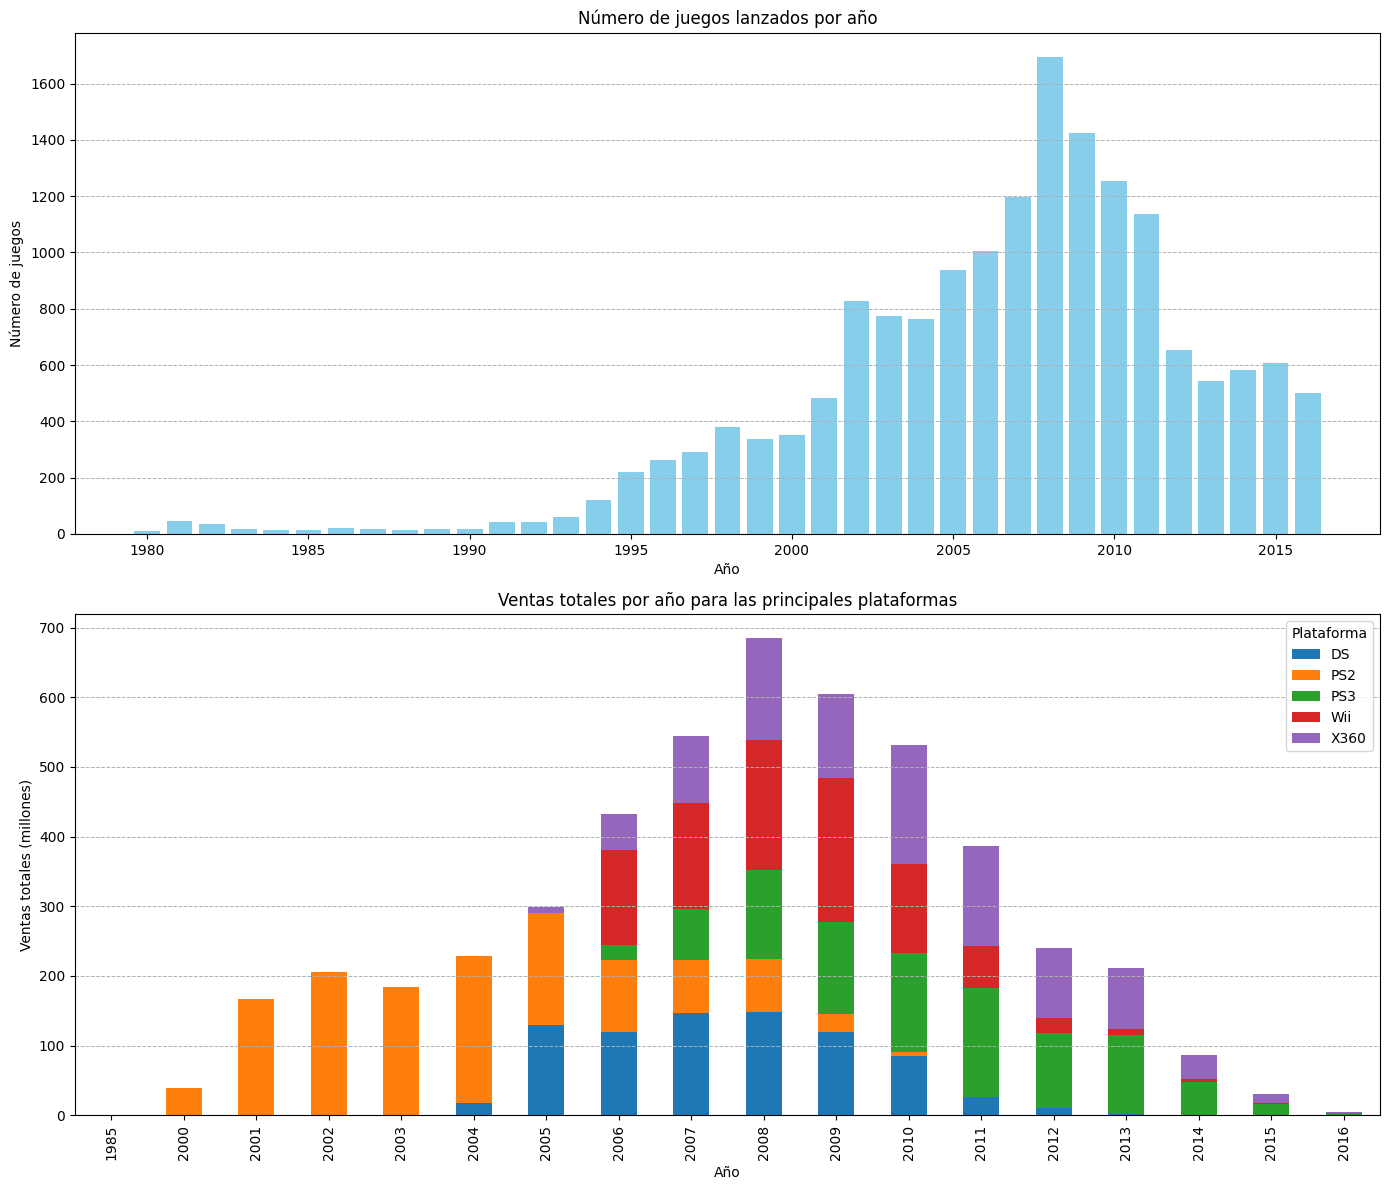

(year_of_release
 1980       9
 1981      46
 1982      36
 1983      17
 1984      14
 1985      14
 1986      21
 1987      16
 1988      15
 1989      17
 1990      16
 1991      41
 1992      43
 1993      60
 1994     121
 1995     219
 1996     263
 1997     289
 1998     379
 1999     338
 2000     350
 2001     482
 2002     829
 2003     775
 2004     762
 2005     939
 2006    1006
 2007    1197
 2008    1696
 2009    1426
 2010    1255
 2011    1136
 2012     653
 2013     544
 2014     581
 2015     606
 2016     502
 Name: count, dtype: int64,
 platform
 PS2     1255.77
 X360     971.42
 PS3      939.65
 Wii      907.51
 DS       806.12
 Name: total_sales, dtype: float64)

In [210]:

# Analizando cuántos juegos fueron lanzados en diferentes años
games_per_year = cleaned_data['year_of_release'].value_counts().sort_index()

# Observando cómo varían las ventas de una plataforma a otra
sales_by_platform = cleaned_data.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

# Identificando las plataformas con las mayores ventas totales
top_platforms = sales_by_platform.head()

# Construyendo una distribución de las ventas por año para las plataformas con mayores ventas totales
top_platforms_years = cleaned_data[cleaned_data['platform'].isin(top_platforms.index)].groupby(['year_of_release', 'platform'])['total_sales'].sum().unstack()

# Visualizando los datos
fig, ax = plt.subplots(2, 1, figsize=(14, 12))

# Número de juegos lanzados por año
ax[0].bar(games_per_year.index, games_per_year.values, color='skyblue')
ax[0].set_title('Número de juegos lanzados por año')
ax[0].set_xlabel('Año')
ax[0].set_ylabel('Número de juegos')
ax[0].grid(axis='y', linestyle='--', linewidth=0.7)

# Ventas totales por año para las principales plataformas
top_platforms_years.plot(kind='bar', stacked=True, ax=ax[1])
ax[1].set_title('Ventas totales por año para las principales plataformas')
ax[1].set_xlabel('Año')
ax[1].set_ylabel('Ventas totales (millones)')
ax[1].legend(title='Plataforma')
ax[1].grid(axis='y', linestyle='--', linewidth=0.7)

plt.tight_layout()
plt.show()
games_per_year, top_platforms


# Análisis de lanzamientos de juegos por año
- El número de juegos lanzados por año ha mostrado una tendencia creciente desde 1980 hasta 2008, con un pico en 2008 (1696 juegos). Después de 2008, hay una tendencia a la baja, posiblemente debido a la transición hacia plataformas de juegos digitales y la consolidación de la industria.

## Análisis de ventas por plataforma
- Las plataformas con las mayores ventas totales son PS2, X360, PS3, Wii y DS. Estas plataformas han sido muy populares en su momento, representando una parte significativa de las ventas de la industria.

### Observaciones sobre las plataformas y las ventas a lo largo del tiempo
- Las plataformas tienden a tener un ciclo de vida en el mercado, donde las ventas aumentan después de su lanzamiento, alcanzan un pico y luego disminuyen a medida que la plataforma se vuelve obsoleta y son reemplazadas por nuevas tecnologías.
- Las plataformas de juegos más antiguas como PS2 y DS ya no generan ventas significativas, indicando que han sido reemplazadas por modelos más nuevos.
- Las nuevas plataformas suelen aparecer cada 5 a 6 años para reemplazar a las anteriores, basándose en la transición de generaciones observadas en los datos (por ejemplo, la transición de PS2 a PS3).

- En conclusión, los datos de cada período son significativos para comprender las tendencias de la industria del juego, incluyendo la popularidad de diferentes plataformas y cómo las ventas se distribuyen a lo largo del tiempo. Los ciclos de vida de las plataformas reflejan las dinámicas de mercado y la evolución tecnológica en la industria del juego.

# Para construir un modelo hipotético predictivo para 2017, debemos considerar el período de tiempo de los datos que proporcionará la información más relevante y actualizada sobre las tendencias del mercado y el comportamiento de los consumidores. Basándonos en el análisis anterior, hay varios puntos clave a considerar:

- Ciclo de vida de las plataformas: Las plataformas tienen un ciclo de vida en el mercado, y las más recientes tendrán más relevancia para las tendencias futuras. Por lo tanto, debemos centrarnos en las plataformas que fueron populares en los años cercanos a 2017.

- Tendencias de lanzamiento de juegos: La cantidad de juegos lanzados alcanzó su punto máximo en 2008 y disminuyó después de eso. Sin embargo, los juegos lanzados en años más cercanos a 2017 serán más representativos de la industria actual.

## Con estos puntos en mente, parece razonable centrarse en los datos de los últimos 5 a 10 años antes de 2017 para capturar las tendencias actuales sin incluir demasiada información obsoleta. Por lo tanto, un buen punto de partida sería tomar datos desde 2007 hasta 2016. Este período cubre el ciclo de vida completo de muchas plataformas relevantes y las tendencias de lanzamiento de juegos, proporcionando una base sólida para pronosticar las ventas en 2017.

### En resumen, para construir un modelo para 2017, deberíamos considerar principalmente los datos del período 2007-2016. Esto nos permitirá analizar las tendencias recientes y hacer predicciones más precisas para el año en cuestión.

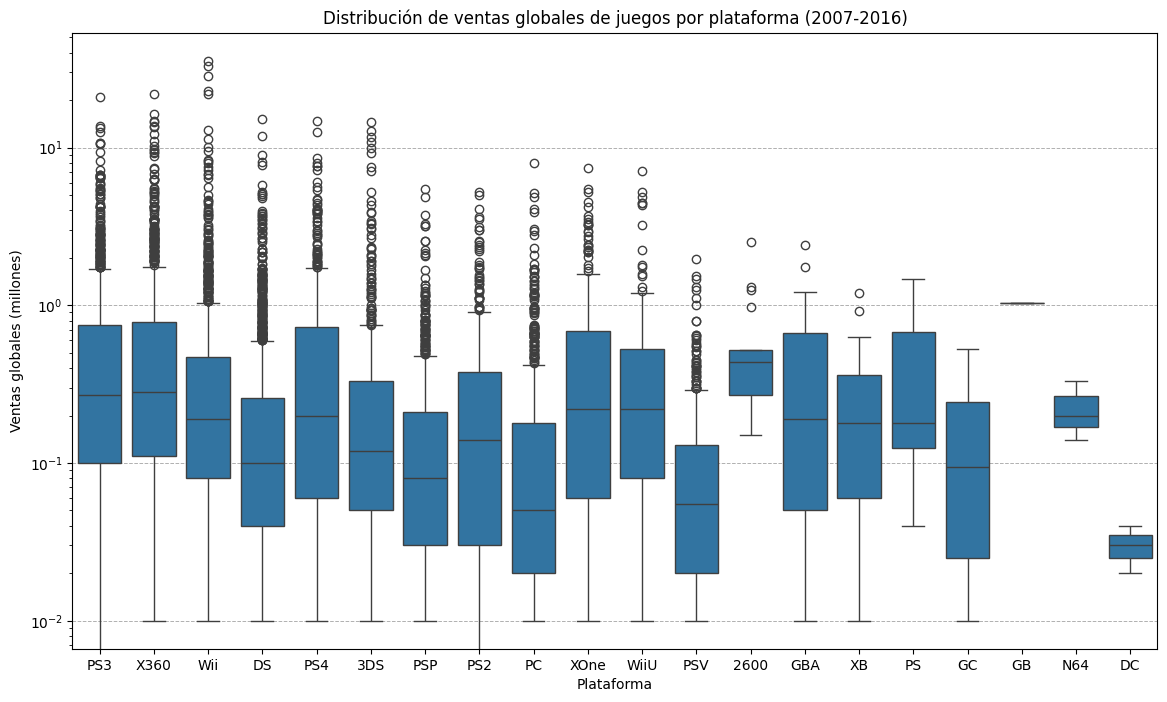

(platform
 PS3     918.69
 X360    911.55
 Wii     770.36
 DS      538.88
 PS4     314.14
 3DS     259.00
 PSP     187.83
 PS2     184.59
 PC      164.33
 XOne    159.32
 WiiU     82.19
 PSV      54.07
 2600     10.50
 GBA       8.37
 XB        6.90
 PS        3.28
 GC        2.47
 GB        1.03
 N64       0.67
 DC        0.06
 Name: total_sales, dtype: float64,
 platform         2600    3DS    DC      DS    GB   GBA    GC   N64     PC  \
 year_of_release                                                             
 2007              NaN    NaN  0.02  146.94   NaN  3.40  0.27   NaN   9.28   
 2008             10.5   1.19  0.04  148.65  1.03  4.97  2.20  0.67  16.18   
 2009              NaN    NaN   NaN  119.54   NaN   NaN   NaN   NaN  16.91   
 2010              NaN    NaN   NaN   85.02   NaN   NaN   NaN   NaN  24.28   
 2011              NaN  63.20   NaN   26.18   NaN   NaN   NaN   NaN  35.03   
 2012              NaN  51.36   NaN   11.01   NaN   NaN   NaN   NaN  23.22   
 2013     

In [211]:
# Filtrando los datos para el período 2007-2016
filtered_data = cleaned_data[(cleaned_data['year_of_release'] >= 2007) & (cleaned_data['year_of_release'] <= 2016)]

# Analizando las ventas totales por plataforma en el período seleccionado
sales_by_platform_period = filtered_data.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

# Identificando las plataformas líderes en ventas y cómo han cambiado a lo largo del tiempo
platforms_trend = filtered_data.groupby(['year_of_release', 'platform'])['total_sales'].sum().unstack()

# Seleccionando las plataformas potencialmente rentables basadas en las tendencias recientes y las ventas totales
potentially_profitable_platforms = platforms_trend.loc[2014:2016].mean().sort_values(ascending=False).head()

# Creando un diagrama de caja para las ventas globales de todos los juegos, desglosados por plataforma
plt.figure(figsize=(14, 8))
sns.boxplot(x='platform', y='total_sales', data=filtered_data, order=sales_by_platform_period.index)
plt.title('Distribución de ventas globales de juegos por plataforma (2007-2016)')
plt.xlabel('Plataforma')
plt.ylabel('Ventas globales (millones)')
plt.yscale('log')
plt.grid(axis='y', linestyle='--', linewidth=0.7)
plt.show()

sales_by_platform_period, platforms_trend, potentially_profitable_platforms


# Líderes en ventas por plataforma (2007-2016)
- Las plataformas líderes en ventas durante el período 2007-2016 fueron PS3, X360 y Wii, con PS3 y X360 casi empatadas en términos de ventas totales.
## Plataformas potencialmente rentables
- Basado en las tendencias recientes (2014-2016), las plataformas más rentables son PS4, XOne, y 3DS. PS4 lidera con una diferencia significativa, seguida de XOne y 3DS.
## Análisis del diagrama de caja
- El diagrama de caja muestra variaciones considerables en las ventas globales entre las diferentes plataformas.
- Plataformas como PS4 y XOne, aunque relativamente nuevas en el período considerado, muestran ventas altas, indicando su creciente popularidad y adopción en el mercado.
- Las ventas promedio por juego varían significativamente entre las plataformas; por ejemplo, PS4 muestra un alto nivel de ventas comparado con otras plataformas, indicando un mayor éxito promedio de sus juegos.
### Conclusiones
- Las diferencias en las ventas son significativas entre las plataformas, reflejando la competencia del mercado, la adopción por los usuarios y la transición entre generaciones de consolas.
- Las plataformas más nuevas, como PS4 y XOne, están creciendo en popularidad y ventas, mientras que plataformas más antiguas como PS3 y X360 muestran una disminución, siguiendo el ciclo natural de reemplazo tecnológico en la industria de los videojuegos.
- Las plataformas con mayores ventas totales y aquellas que muestran un crecimiento reciente son las más potencialmente rentables para enfocar en el modelo para 2017.

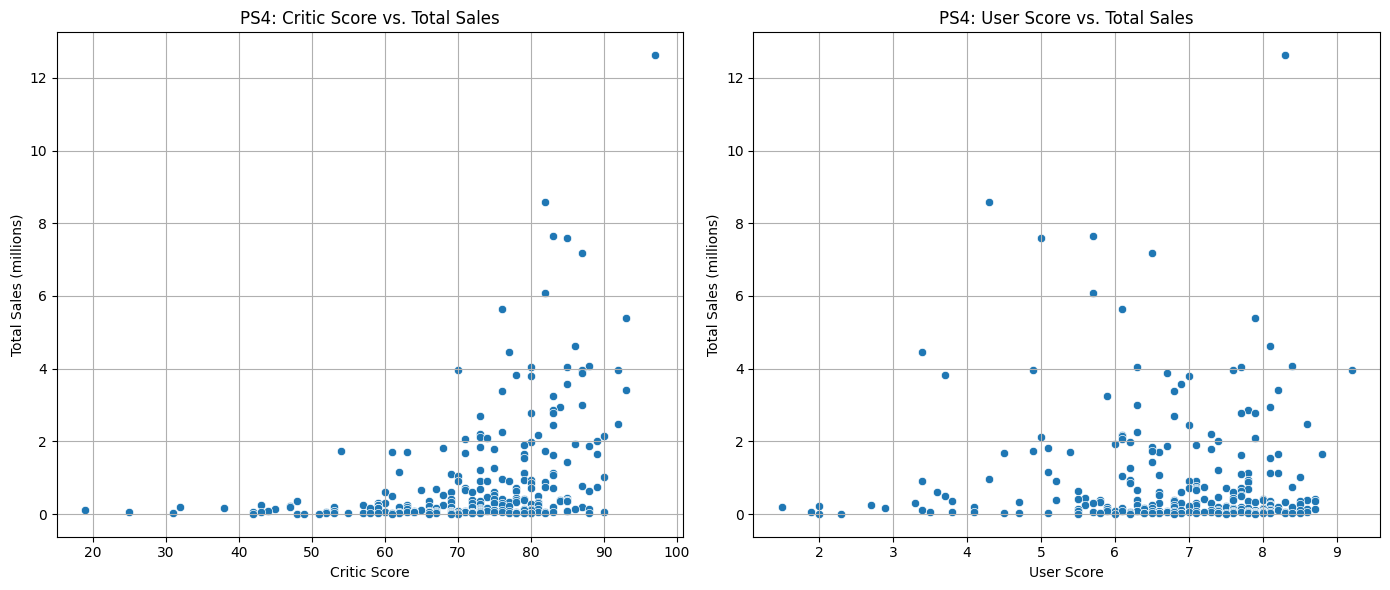

(0.4058948014583667, -0.0336249759652888)

In [212]:
# Elegimos una plataforma popular para el análisis, por ejemplo, PS4
platform_data = filtered_data[filtered_data['platform'] == 'PS4']

# Eliminando filas donde 'user_score' o 'critic_score' son nulos para poder calcular correlaciones
platform_data_nonull = platform_data.dropna(subset=['user_score', 'critic_score'])

# Creando gráficos de dispersión para visualizar la relación entre las reseñas y las ventas
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Gráfico de dispersión para critic_score vs. total_sales
sns.scatterplot(ax=ax[0], x='critic_score', y='total_sales', data=platform_data_nonull)
ax[0].set_title('PS4: Critic Score vs. Total Sales')
ax[0].set_xlabel('Critic Score')
ax[0].set_ylabel('Total Sales (millions)')
ax[0].grid(True)

# Gráfico de dispersión para user_score vs. total_sales
sns.scatterplot(ax=ax[1], x='user_score', y='total_sales', data=platform_data_nonull)
ax[1].set_title('PS4: User Score vs. Total Sales')
ax[1].set_xlabel('User Score')
ax[1].set_ylabel('Total Sales (millions)')
ax[1].grid(True)

plt.tight_layout()
plt.show()

# Calculando la correlación entre las reseñas y las ventas
correlation_critic = platform_data_nonull['critic_score'].corr(platform_data_nonull['total_sales'])
correlation_user = platform_data_nonull['user_score'].corr(platform_data_nonull['total_sales'])

correlation_critic, correlation_user


# Análisis de la correlación entre reseñas y ventas en PS4
- La correlación entre las puntuaciones de los críticos (critic_score) y las ventas totales es de aproximadamente 0.41, lo que indica una relación positiva moderada. Esto sugiere que, en general, los juegos con mejores críticas tienden a tener mayores ventas en la plataforma PS4.
- La correlación entre las puntuaciones de los usuarios (user_score) y las ventas totales es de aproximadamente -0.03, lo que indica una relación muy débil y prácticamente nula. Esto sugiere que las puntuaciones de los usuarios no tienen una influencia significativa en las ventas totales de los juegos en PS4.
## Conclusiones
- Las reseñas de profesionales (críticos) parecen tener una influencia positiva en las ventas de juegos en PS4, mientras que las reseñas de los usuarios no muestran una correlación clara con las ventas.
- Esto podría indicar que los compradores potenciales dan más peso a las reseñas de profesionales que a las de usuarios al decidir comprar juegos en la plataforma PS4.

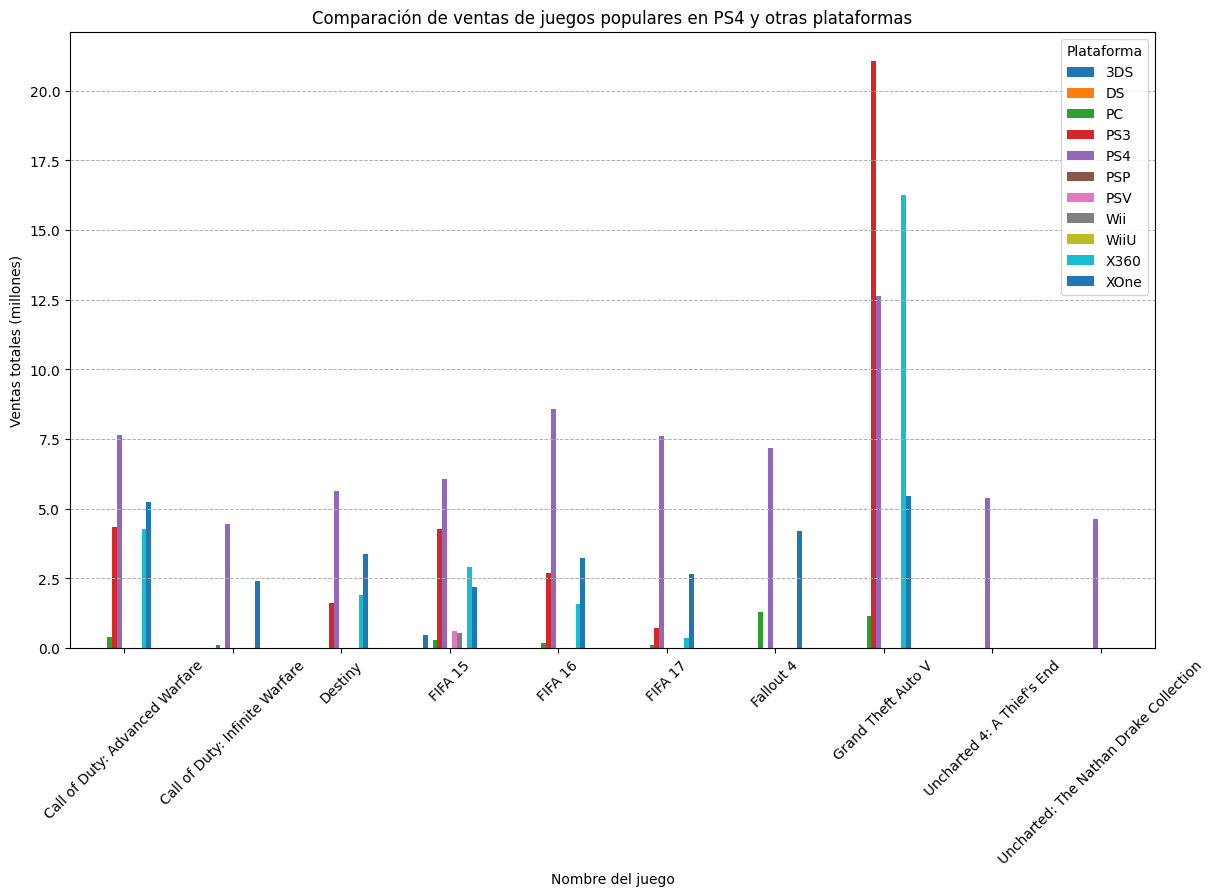

platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
name,,,,,,,,,,,
Call of Duty: Advanced Warfare,NaN,NaN,0.41,4.36,7.66,NaN,NaN,NaN,NaN,4.28,5.26
Call of Duty: Infinite Warfare,NaN,NaN,0.13,NaN,4.47,NaN,NaN,NaN,NaN,NaN,2.42
Destiny,NaN,NaN,NaN,1.61,5.64,NaN,NaN,NaN,NaN,1.92,3.37
FIFA 15,0.46,NaN,0.29,4.28,6.08,NaN,0.6,0.56,NaN,2.92,2.18
FIFA 16,NaN,NaN,0.20,2.70,8.58,NaN,NaN,NaN,NaN,1.57,3.25
FIFA 17,NaN,NaN,0.12,0.73,7.60,NaN,NaN,NaN,NaN,0.38,2.65
Fallout 4,NaN,NaN,1.28,NaN,7.17,NaN,NaN,NaN,NaN,NaN,4.22
Grand Theft Auto V,NaN,NaN,1.17,21.05,12.62,NaN,NaN,NaN,NaN,16.27,5.47
Uncharted 4: A Thief's End,NaN,NaN,NaN,NaN,5.39,NaN,NaN,NaN,NaN,NaN,NaN


In [213]:
# Identificando juegos que están en múltiples plataformas, incluyendo PS4
multiplatform_games = filtered_data[filtered_data['name'].isin(platform_data['name'])]

# Agrupando los datos por nombre del juego y plataforma para comparar las ventas
multiplatform_sales = multiplatform_games.groupby(['name', 'platform'])['total_sales'].sum().unstack()

# Seleccionando algunos de los juegos más populares en PS4 para la comparación
popular_ps4_games = platform_data_nonull.sort_values(by='total_sales', ascending=False).head(10)['name']
multiplatform_sales_comparison = multiplatform_sales.loc[multiplatform_sales.index.isin(popular_ps4_games)]

multiplatform_sales_comparison.plot(kind='bar', figsize=(14, 8), title='Comparación de ventas de juegos populares en PS4 y otras plataformas')
plt.ylabel('Ventas totales (millones)')
plt.xlabel('Nombre del juego')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', linewidth=0.7)
plt.legend(title='Plataforma')
plt.show()

multiplatform_sales_comparison


# La comparación de ventas de juegos populares en PS4 con otras plataformas revela varios puntos interesantes:

- Grand Theft Auto V y Call of Duty: Advanced Warfare son ejemplos de juegos con alto rendimiento en múltiples plataformas, incluyendo PS3, PS4, y Xbox 360 (X360).
- Grand Theft Auto V se destaca con ventas significativas en PS3 y PS4, mostrando el impacto de un título fuerte en varias generaciones de consolas.
- Juegos como FIFA 16 y FIFA 17 tienen buenas ventas en PS4, PS3, y Xbox One (XOne), lo que indica una base de fanáticos consistente a través de diferentes plataformas.
- Algunos juegos, como Uncharted 4: A Thief's End y Uncharted: The Nathan Drake Collection, son exclusivos de PS4 y muestran ventas sólidas, lo que refleja el valor de los títulos exclusivos para las ventas de una plataforma.
# Conclusiones
- Los juegos populares en PS4 tienden a tener un buen rendimiento en otras plataformas, especialmente en las que están dentro de la misma familia (como PS3) o son su principal competencia (como Xbox One).
- Las diferencias en las ventas entre las plataformas pueden atribuirse a factores como la exclusividad del juego, la base de usuarios de cada plataforma y el momento de lanzamiento del juego en relación con el ciclo de vida de la plataforma.
- Los juegos multiplataforma tienen el potencial de aumentar significativamente las ventas totales al estar disponibles en varias plataformas, mientras que los juegos exclusivos pueden ser cruciales para el éxito de una plataforma específica.

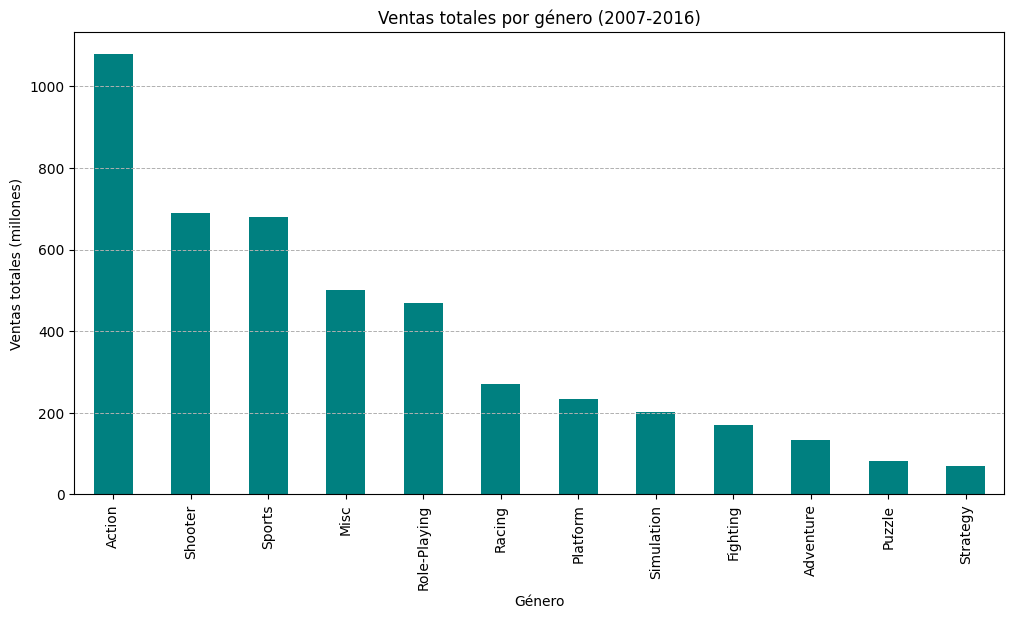

genre
Action          1078.24
Shooter          689.89
Sports           679.67
Misc             500.11
Role-Playing     468.51
Racing           270.37
Platform         232.67
Simulation       201.14
Fighting         170.87
Adventure        134.25
Puzzle            81.86
Strategy          70.65
Name: total_sales, dtype: float64

In [214]:
# Analizando la distribución general de los juegos por género y las ventas totales
genre_sales = filtered_data.groupby('genre')['total_sales'].sum().sort_values(ascending=False)

# Creando un gráfico de barras para mostrar las ventas totales por género
plt.figure(figsize=(12, 6))
genre_sales.plot(kind='bar', color='teal')
plt.title('Ventas totales por género (2007-2016)')
plt.xlabel('Género')
plt.ylabel('Ventas totales (millones)')
plt.grid(axis='y', linestyle='--', linewidth=0.7)
plt.show()

genre_sales


# La distribución de las ventas totales por género muestra lo siguiente:

## Géneros más rentables:
- El género Action es el más rentable con ventas significativamente más altas que otros géneros, seguido de Shooter y Sports. Esto indica una fuerte preferencia del mercado hacia juegos de acción, shooters y deportes.
## Géneros con ventas moderadas:
- Géneros como Misc (variados), Role-Playing, y Racing tienen ventas moderadas, mostrando que, aunque populares, no alcanzan las mismas alturas en términos de ventas totales comparadas con los géneros principales.
### Géneros menos rentables:
- Puzzle, Adventure, y Strategy están en la parte inferior de la lista en términos de ventas totales, lo que indica que estos géneros, aunque pueden tener un nicho dedicado, no generan tanto en ventas como los géneros más populares.
#### Generalizaciones sobre los géneros con ventas altas y bajas
- Los géneros con ventas altas como Acción, Shooter y Deportes tienden a ser más masivos y populares entre una amplia gama de jugadores. Estos géneros a menudo se asocian con grandes franquicias y reciben mucha atención mediática y marketing.
- Los géneros con ventas bajas como Puzzle, Adventure, y Strategy pueden apelar a audiencias más específicas o nicho. Estos juegos pueden no tener el mismo nivel de visibilidad o presupuestos de marketing que los géneros más vendidos.

In [215]:
# Definiendo las regiones a analizar
regions = ['na_sales', 'eu_sales', 'jp_sales']

# Inicializando un diccionario para almacenar los perfiles de usuario por región
user_profiles = {}

for region in regions:
    # Las cinco plataformas principales por región
    top_platforms = filtered_data.groupby('platform')[region].sum().sort_values(ascending=False).head(5)
    
    # Los cinco géneros principales por región
    top_genres = filtered_data.groupby('genre')[region].sum().sort_values(ascending=False).head(5)
    
    # Impacto de las clasificaciones ESRB en las ventas por región
    esrb_impact = filtered_data.groupby('rating')[region].sum().sort_values(ascending=False)
    
    # Almacenando los resultados en el diccionario
    user_profiles[region] = {'top_platforms': top_platforms, 'top_genres': top_genres, 'esrb_impact': esrb_impact}

# Mostrando los perfiles de usuario por región
for region, profile in user_profiles.items():
    print(f"--- {region.upper()} ---")
    print("Top Platforms:")
    print(profile['top_platforms'])
    print("\nTop Genres:")
    print(profile['top_genres'])
    print("\nESRB Impact:")
    print(profile['esrb_impact'])
    print("\n")



--- NA_SALES ---
Top Platforms:
platform
X360    560.41
Wii     426.04
PS3     384.65
DS      276.07
PS4     108.74
Name: na_sales, dtype: float64

Top Genres:
genre
Action          508.01
Shooter         357.52
Sports          337.09
Misc            266.86
Role-Playing    176.18
Name: na_sales, dtype: float64

ESRB Impact:
rating
E                 682.74
M                 552.14
T                 383.47
E10+              295.43
No Clasificado    268.59
EC                  1.32
RP                  0.00
Name: na_sales, dtype: float64


--- EU_SALES ---
Top Platforms:
platform
PS3     322.91
X360    259.49
Wii     218.59
PS4     141.09
DS      120.40
Name: eu_sales, dtype: float64

Top Genres:
genre
Action     343.81
Shooter    232.98
Sports     216.95
Misc       129.76
Racing     106.65
Name: eu_sales, dtype: float64

ESRB Impact:
rating
E                 399.46
M                 389.83
T                 223.13
No Clasificado    212.15
E10+              167.92
RP                  0.08
E

# Perfiles de usuario por región

## América del Norte (NA)
- Top Plataformas: X360, Wii, PS3, DS, y PS4 dominan, con X360 liderando.
- Top Géneros: Action, Shooter, Sports, Misc, y Role-Playing son los más populares, destacando una preferencia por juegos de acción y shooters.
- Impacto de ESRB: Las clasificaciones 'E' (Everyone) y 'M' (Mature) tienen las mayores ventas, indicando una división entre juegos familiares y para adultos.

## Europa (EU)
- Top Plataformas: PS3 lidera, seguida de X360, Wii, PS4, y DS. La preferencia es ligeramente diferente a NA, con una mayor inclinación hacia la PS3.
- Top Géneros: Action y Shooter también son populares, seguidos de Sports, Misc, y Racing, mostrando una preferencia similar a NA pero con más interés en juegos de carreras.
- Impacto de ESRB: Clasificaciones 'E' y 'M' nuevamente son dominantes, con una distribución similar a NA, mostrando gustos parecidos en términos de contenido de juegos.

## Japón (JP)
- Top Plataformas: DS, 3DS, PS3, PSP, y Wii son las más populares, con una fuerte preferencia por plataformas portátiles como DS y 3DS.
- Top Géneros: Role-Playing lidera significativamente, seguido de Action, Misc, Sports, y Adventure, reflejando una fuerte preferencia por juegos de rol.
- Impacto de ESRB: La mayoría de los juegos no están clasificados ('No Clasificado'), lo cual es significativo, seguido por 'E' y 'T', indicando un mercado único con menos influencia de las clasificaciones ESRB en comparación con NA y EU.

## Conclusiones
- Las preferencias de plataformas varían entre las regiones, con una fuerte inclinación hacia las consolas domésticas en NA y EU, y una preferencia por las portátiles en JP.
- Los géneros de juegos muestran variaciones regionales, con un interés común en juegos de acción y deportes en NA y EU, mientras que en JP predominan los juegos de rol.
- Las clasificaciones ESRB tienen un impacto diferente en las ventas por región, siendo más relevante en NA y EU, mientras que en JP hay una gran cantidad de juegos sin clasificar, posiblemente debido a diferencias culturales y de mercado.

In [216]:
# Estableciendo el valor de umbral alfa
alpha = 0.05

# Preparando los datos para las pruebas
xone_user_scores = filtered_data[(filtered_data['platform'] == 'XOne') & filtered_data['user_score'].notna()]['user_score']
pc_user_scores = filtered_data[(filtered_data['platform'] == 'PC') & filtered_data['user_score'].notna()]['user_score']

action_user_scores = filtered_data[(filtered_data['genre'] == 'Action') & filtered_data['user_score'].notna()]['user_score']
sports_user_scores = filtered_data[(filtered_data['genre'] == 'Sports') & filtered_data['user_score'].notna()]['user_score']

# Realizando la prueba t para comparar las calificaciones promedio de usuarios entre Xbox One y PC
t_stat_platform, p_value_platform = ttest_ind(xone_user_scores, pc_user_scores)

# Realizando la prueba t para comparar las calificaciones promedio de usuarios entre los géneros de Acción y Deportes
t_stat_genre, p_value_genre = ttest_ind(action_user_scores, sports_user_scores)

# Interpretando los resultados
platform_result = "diferentes" if p_value_platform < alpha else "iguales"
genre_result = "diferentes" if p_value_genre < alpha else "iguales"

p_value_platform, p_value_genre, platform_result, genre_result

(0.051442053986115704, 2.3273852170055055e-11, 'iguales', 'diferentes')

# Resultados de las pruebas
1. Comparación de calificaciones de usuarios para Xbox One y PC
Valor-p: 0.0514
Interpretación: Con un valor de umbral alfa de 0.05, el valor-p es ligeramente superior a alfa, lo que significa que no hay suficiente evidencia estadística para rechazar la hipótesis nula. Por lo tanto, concluimos que las calificaciones promedio de los usuarios para Xbox One y PC son "iguales" desde el punto de vista estadístico.
2. Comparación de calificaciones de usuarios para los géneros de Acción y Deportes
- Interpretación: Con un valor-p significativamente menor que alfa, rechazamos la hipótesis nula y concluimos que las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son "diferentes".

## Conclusión
- Para las plataformas Xbox One y PC, no encontramos evidencia significativa para afirmar que las calificaciones promedio de los usuarios son diferentes. Esto podría indicar que los usuarios perciben la calidad de los juegos de manera similar en estas plataformas.

- Para los géneros de Acción y Deportes, encontramos una diferencia significativa en las calificaciones promedio de los usuarios, sugiriendo que las percepciones de los usuarios varían considerablemente entre estos géneros.

# Conclusión General del Análisis de Videojuegos

## Descripción de los Datos
### El dataset contiene las siguientes columnas:

- name: Nombre del videojuego.
- platform: Plataforma en la que está disponible el juego (ej. PS4, Xbox One, PC).
- year_of_release: Año en que el juego fue lanzado.
- genre: Género del juego (ej. Acción, Deportes, etc.).
- na_sales: Ventas en Norteamérica (en millones de dólares).
- eu_sales: Ventas en Europa (en millones de dólares).
- jp_sales: Ventas en Japón (en millones de dólares).
- other_sales: Ventas en otras regiones (en millones de dólares).
- critic_score: Puntuación otorgada por críticos (máximo de 100).
- user_score: Puntuación otorgada por usuarios (máximo de 10).
rating: Clasificación dada por la ESRB.
- Es importante tener en cuenta que los datos del año 2016 podrían estar incompletos.

### Análisis Realizado
- El análisis exploró varios aspectos del mercado de videojuegos:

- Tendencias a lo largo del tiempo: Se observó un aumento en el número de lanzamientos de juegos hasta 2008, seguido de una disminución, lo que podría reflejar cambios en la industria y la transición a plataformas digitales.

- Comparación de plataformas: Las plataformas varían en popularidad y ventas a lo largo del tiempo, con ciertas plataformas como PS4 y Xbox One mostrando crecimiento reciente.

- Influencia de géneros y clasificaciones ESRB: Los géneros de videojuegos muestran diferencias significativas en las ventas, con los juegos de acción y deportes siendo particularmente populares. Además, las clasificaciones ESRB tienen un impacto variado en las ventas según la región.

### Pruebas de hipótesis:

- No se encontró diferencia estadística en las calificaciones de usuarios entre las plataformas Xbox One y PC, sugiriendo percepciones similares de los usuarios.
- Se encontró una diferencia significativa en las calificaciones de los géneros de Acción y Deportes, indicando distintas percepciones de los usuarios.

#### Conclusiones Finales

- El mercado de videojuegos es dinámico y muestra variaciones significativas en función de la plataforma, el género y la región. Las preferencias de los usuarios y las tendencias de ventas pueden variar ampliamente, destacando la importancia de adaptar las estrategias de mercado a estos factores. Las pruebas de hipótesis subrayaron la importancia de comprender las percepciones de los usuarios, que pueden influir en el éxito de los juegos en diferentes plataformas y géneros.

- Este análisis proporciona una visión valiosa de la industria de los videojuegos, ayudando a identificar factores clave que pueden influir en el éxito de los juegos en el mercado global.